<a href="https://colab.research.google.com/github/changchuntzu0618/CS456-ANNandRL-DDPG/blob/Jessica/Miniproject_DDPG/DDPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/CS456-ANNandRL-DDPG-master/Miniproject_DDPG

/content/gdrive/MyDrive/Colab Notebooks/CS456-ANNandRL-DDPG-master/Miniproject_DDPG


In [1]:
import gym
from helpers import NormalizedEnv, RandomAgent
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from mpl_toolkits.mplot3d import Axes3D
from pylab import*
import os
from tqdm import tqdm
# set colab to Trueif using google colab
colab=False

## 3. Heuristic Policy

In [54]:
# Implement a heuristic policy
class HeuristicPendulumAgent():
    def __init__(self, env):
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.shape[0]
        self.agent_name='HeuristicPendulumAgent'

    def get_agent_name(self):
        return self.agent_name
        

    def compute_action(self, state,fix_torque=1):
        #  print('fix_torque',fix_torque)
         # When the pendulum is in the lower half of the domain (x<0)
         if state[0]<0:
             # applies a fixed torque in the same direction as the pendulum’s angular velocity
             return fix_torque*np.sign(state[2])
         # When the pendulum is in the higher half of the domain (x>0)
         else:
             # applies a fixed torque in the  opposite direction as the pendulum’s angular velocity
             return -1*fix_torque*np.sign(state[2])

In [55]:
def DoState(env,agent,observation,total_reward_per_episode,agent_name='RandomAgent',fix_torque=0.1):
    if agent_name=='HeuristicPendulumAgent':
        action = agent.compute_action(observation,fix_torque)
    else:
        action = agent.compute_action(observation)
    # print('action:',action)
    normalized_env = NormalizedEnv(env)
    normalized_action = normalized_env.action(action)
    # print('normalized_action:',normalized_action)
    observation, reward, terminated, truncated, info = env.step(normalized_action)
    # print('observation:',observation)
    # print('reward:',reward)
    # print('terminated:',terminated)
    total_reward_per_episode += reward
    # print('total_reward:',total_reward)
    if terminated or truncated:
        observation, info = env.reset()

    return observation, info, total_reward_per_episode

def DoEpisode(env,agent,agent_name='RandomAgent',fix_torque=0.1,num_state=200) :
    observation, info = env.reset()
    total_reward_per_episode=0
    for _ in range(num_state):
        observation, info, total_reward_per_episode=DoState(env,agent,observation,total_reward_per_episode,agent_name,fix_torque)
        # print("total_reward_per_episode:",total_reward_per_episode)
    return total_reward_per_episode

total_reward: -627.2265883532475
average_reward: -627.2265883532475
total_reward: -1266.1454374935033
average_reward: -633.0727187467517
total_reward: -2624.168806404506
average_reward: -874.7229354681687
total_reward: -3811.934606873653
average_reward: -952.9836517184133
total_reward: -4776.95010503538
average_reward: -955.390021007076
total_reward: -5405.185016278633
average_reward: -900.8641693797722
total_reward: -6460.005788445832
average_reward: -922.857969777976
total_reward: -7929.938492438404
average_reward: -991.2423115548005
total_reward: -9478.839021752141
average_reward: -1053.204335750238
total_reward: -10855.066197977749
average_reward: -1085.5066197977749
total_reward: -989.0706840291793
average_reward: -989.0706840291793
total_reward: -2151.2731509591063
average_reward: -1075.6365754795531
total_reward: -3610.950216582076
average_reward: -1203.6500721940254
total_reward: -5068.594862489471
average_reward: -1267.1487156223677
total_reward: -6512.420546813386
average_rew

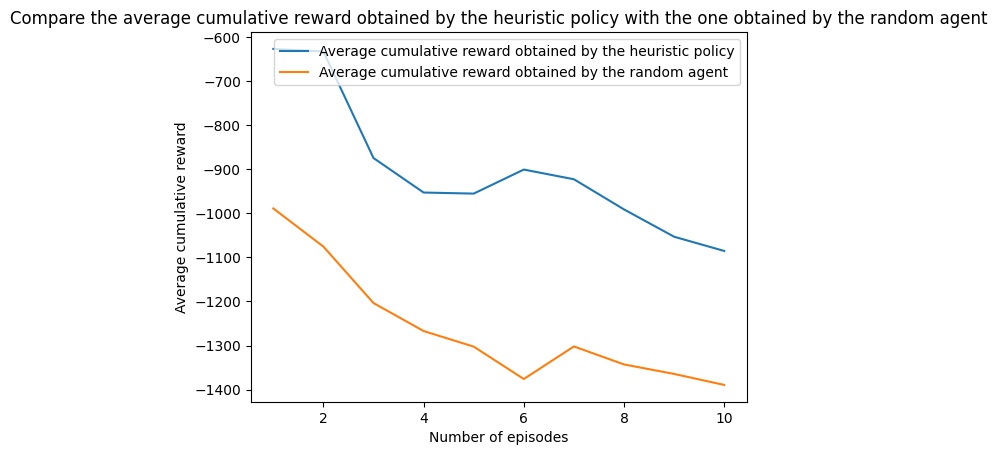

In [56]:
env = gym.make("Pendulum-v1")
num_episode=10
# Part 3: Report the average cumulative reward obtained by the heuristic policy
# draw plot to compare the average cumulative reward obtained by the heuristic policy 
# with the reward of the random agent
list_average_reward_HeuristicAgent=[]
total_episodes_reward_HeuristicAgent = 0
for episode in range(num_episode):
    agent = HeuristicPendulumAgent(env)
    total_reward_per_episode=DoEpisode(env, agent,agent.get_agent_name())
    total_episodes_reward_HeuristicAgent += total_reward_per_episode
    print('total_reward:', total_episodes_reward_HeuristicAgent)
    average_reward = total_episodes_reward_HeuristicAgent / (episode + 1)
    print('average_reward:', average_reward)
    list_average_reward_HeuristicAgent.append(average_reward)

list_average_reward_RandomAgent=[]
total_episodes_reward_RandomAgent = 0
for episode in range(num_episode):
    agent = RandomAgent(env)
    total_reward_per_episode=DoEpisode(env, agent)
    total_episodes_reward_RandomAgent += total_reward_per_episode
    print('total_reward:', total_episodes_reward_RandomAgent)
    average_reward = total_episodes_reward_RandomAgent / (episode + 1)
    print('average_reward:', average_reward)
    list_average_reward_RandomAgent.append(average_reward)

list_number_episodes = np.linspace(1,10,num=10)

plt.plot(list_number_episodes,list_average_reward_HeuristicAgent,label= 'Average cumulative reward obtained by the heuristic policy')
plt.plot(list_number_episodes,list_average_reward_RandomAgent,label= 'Average cumulative reward obtained by the random agent')
plt.xlabel('Number of episodes')
plt.ylabel('Average cumulative reward')
plt.legend()
plt.title('Compare the average cumulative reward obtained by the heuristic policy with the one obtained by the random agent')
plt.show()
env.close()

In [ ]:
# Part 3: Report the average cumulative reward obtained by the heuristic policy
# draw plot to show the impact of different amplitude of the fixed torque have on the reward
env = gym.make("Pendulum-v1")
num_episode=10
list_last_average_reward=[]
list_fix_torque=np.linspace(0.1, 2.0, num=20)
print(list_fix_torque)
for fix_torque in list_fix_torque:
    total_episodes_reward_HeuristicAgent=0
    for episode in range(num_episode):
        agent = HeuristicPendulumAgent(env)
        total_reward_per_episode=DoEpisode(env,agent,agent.get_agent_name(),fix_torque)
        total_episodes_reward_HeuristicAgent += total_reward_per_episode
        print('total_reward:', total_episodes_reward_HeuristicAgent)
        average_reward = total_episodes_reward_HeuristicAgent / (episode + 1)
        print('average_reward:', average_reward)
    list_last_average_reward.append(average_reward)
plt.plot(list_fix_torque,list_last_average_reward,'-o')
plt.xlabel("Fix Torque")
plt.ylabel("Average Reward (10 episodes)")
plt.title('Average Reward with differnt Fixed Torque (HeuristicPendulumAgent)')
plt.xticks(list_fix_torque)
plt.show()
env.close()

In [ ]:
import gym
env = gym.make("Pendulum-v1")
if colab:
  #if run in google colab
  observation = env.reset(seed=42)
else:
  #if run in own compuetr
  observation, info = env.reset(seed=42)

for _ in range(10):
    action = env.action_space.sample()
    if colab:
      observation, reward, terminated, info = env.step(action)
    else:
      observation, reward, terminated, truncated, info = env.step(action)
    print('observation:',observation)
    print('reward:',reward)
    # print('truncated:',truncated)
    # print(1-truncated)
    print(np.append(observation,reward))
    if not colab:
      if terminated or truncated:
          observation, info = env.reset()
env.close()

## 4. Q function of the heuristic policy 

In [14]:
import random
# Implement the Replay Buffer
class ReplayBuffer():
    def __init__(self, max_size):
        # max_size: how many transitions replay buffer can store at most
        self.max_size = max_size
        self.total_transition = []

    def add(self, transition):
        # transition: a tuple of (state, action, reward, next_state, trunc)

        # check if the replay buffer is full
        if len(self.total_transition) >= self.max_size:
            # print("The replay buffer is full.-> remove the oldest transition")
            # remove the oldest transition
            self.total_transition.pop(0)
        # add transition to replay buffer
        self.total_transition.append(transition)
        
    def sample(self, batch_size):
        # batch_size: how many transitions will be sampled
        # return a batch of transitions
        
        # check if the replay buffer is empty
        if len(self.total_transition) == 0:
            print("The replay buffer is empty.")
            return None
        
        # check if the replay buffer has enough transitions
        if len(self.total_transition) < batch_size:
            print("The replay buffer does not have enough transitions.")
            return None
        
        # sample batch_size transitions from the replay buffer randomly
        return random.sample(self.total_transition, batch_size)
    def __len__(self):
        return len(self.total_transition)

In [15]:
# Implement the class QNetwork
class QNetwork(nn.Module):
    def __init__(self, input_dim=4, output_dim=1, hidden_dim=32):
        super(QNetwork, self).__init__()
        # input_dim: dimension of the input -> 3 elements of the state and 1 of the action
        # hidden_dim: dimension of one hidden layer -> 32 nodes
        # output_dim: dimension of action -> a scalar value (the expected cumulative reward)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, state):
        # state: state -> 3 elements of the state and 1 of the action
        # return expected cumulative reward 
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x   

In [53]:
# Implement the 1-step TD-learning rule for the QNetwork
def train_QNetwork(Q_network,Q_target,normalized_env,agent, batch, gamma, optimizer,last_step,device,fix_torque=1,policy_network=None,deterministic=None):
    # print("HERE TRAIN")
    # Q_network: Q Network
    # agent: policy use for action selection
    # batch: a batch of transitions
    # gamma: discount factor
    # optimizer: optimizer
    # fix_torque: fixed torque for HeuristicPendulumAgent
    
    # unpack the batch of transitions
    # input_batch:put together 3 elements of the state and 1 of the action
    input_batch=torch.tensor([np.append(transition[0],transition[1]) for transition in batch], dtype=torch.float).to(device)
    # print the shape of input batch
    # print('input_batch:',input_batch.shape)
    # print('input_batch:',input_batch[0])
    reward_batch = torch.tensor([transition[2] for transition in batch], dtype=torch.float)
    # print('reward_batch:',reward_batch.shape)
    # print('reward_batch:',reward_batch[0])
    reward_batch=torch.unsqueeze(reward_batch, 1)
    # print('reward_batch:',reward_batch.shape)
    # print('reward_batch:',reward_batch[0])
    if agent.agent_name =='HeuristicPendulumAgent':
        # print('agent name',agent.agent_name)
        target_batch=torch.tensor([np.append(transition[3], agent.compute_action(transition[3],fix_torque)) for transition in batch], dtype=torch.float).to(device)
    else:
        target_batch=torch.tensor([np.append(transition[3], agent.compute_action(policy_network,transition[3],deterministic)) for transition in batch], dtype=torch.float).to(device)
    # print('target_batch:',target_batch[0])
    # print('target_batch:',target_batch.shape)
    trunc_batch=torch.tensor([transition[4] for transition in batch], dtype=torch.float)

    # clear the gradients of the optimizer
    optimizer.zero_grad()

    # compute the Q values of the current state + action pair
    # Q_network.train()
    Q_values = Q_network(input_batch)
    
    # The target should not be differentiated, i.e., wrap it in a with torch.no grad()
    # TODO: check with TA if it is correct
    with torch.no_grad():
        # Q_network.eval()
        # compute the Q values of the next state + next action pair
        Q_next_values = Q_target(target_batch)

    # print the shape of reward batch, gamma, Q_next_values, trunc_batch
    # print('reward_batch:',reward_batch.shape)
    # print('gamma:',gamma.shape)
    # print('Q_next_values:',Q_next_values.shape)
    # print('1-trunc_batch:',torch.unsqueeze((1 - trunc_batch), 1).shape)
    # print('Q*truc:',(Q_next_values * torch.unsqueeze((1 - trunc_batch), 1)).shape)
    Q_target_values = reward_batch + gamma * Q_next_values * torch.unsqueeze((1 - trunc_batch), 1)
    # if not last_step:
    #     # compute the target Q values
    #     Q_target_values = reward_batch + gamma * Q_next_values# * (1 - trunc_batch)
    # else:
    #     Q_target_values = reward_batch
    # print('Q_values:',Q_values.requires_grad)
    # print('Q_next_values:',Q_next_values.requires_grad)
    # print('Q_target_values:',Q_target_values.requires_grad)
    # for param, target_param in zip(Q_network.parameters(), Q_target.parameters()):
    #     print("TRAIN param:",param[0],param[0].requires_grad,"target_param:",target_param[0],target_param[0].requires_grad)
    #     break
        
    # compute the loss
    loss = F.mse_loss(Q_values.view(-1, 1), Q_target_values.view(-1, 1))
    # print('loss:',loss.requires_grad)
    
    # compute the gradients of the loss
    loss.backward()
    # # show the gradients of the parameters in the Q network
    # print("Q_network:",Q_network.fc1.weight.grad[0])
    # try:
    #     print("Q_target:",Q_target.fc1.weight.grad[0])
    # except:
    #     pass
    
    # update the weights of the Q network
    optimizer.step()
    
    return loss.item(), Q_network

device: cpu
Start training...


  0%|          | 0/200 [00:00<?, ?it/s]

The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay b

  0%|          | 1/200 [00:00<01:25,  2.32it/s]

average_loss: 7.598064169883728


  1%|          | 2/200 [00:01<02:15,  1.46it/s]

average_loss: 22.154830794334412


  2%|▏         | 3/200 [00:02<02:40,  1.23it/s]

average_loss: 17.335087459087372


  2%|▏         | 4/200 [00:04<04:21,  1.34s/it]

average_loss: 18.91084959745407


  2%|▎         | 5/200 [00:06<05:30,  1.69s/it]

average_loss: 19.69480519771576


  3%|▎         | 6/200 [00:08<06:06,  1.89s/it]

average_loss: 21.080498099327087


  4%|▎         | 7/200 [00:11<06:41,  2.08s/it]

average_loss: 23.118949222564698


  4%|▍         | 8/200 [00:13<06:57,  2.18s/it]

average_loss: 29.16453902721405


  4%|▍         | 9/200 [00:16<06:57,  2.19s/it]

average_loss: 35.14247602462768


  5%|▌         | 10/200 [00:18<06:53,  2.18s/it]

average_loss: 45.56804032325745


  6%|▌         | 11/200 [00:20<07:15,  2.31s/it]

average_loss: 62.85898585319519


  6%|▌         | 12/200 [00:23<07:13,  2.31s/it]

average_loss: 82.77033147811889


  6%|▋         | 13/200 [00:25<07:12,  2.31s/it]

average_loss: 107.6633316040039


  7%|▋         | 14/200 [00:27<06:54,  2.23s/it]

average_loss: 135.91851139068604


  8%|▊         | 15/200 [00:29<06:42,  2.18s/it]

average_loss: 183.0761360168457


  8%|▊         | 16/200 [00:31<06:45,  2.20s/it]

average_loss: 195.11138370513916


  8%|▊         | 17/200 [00:34<06:43,  2.20s/it]

average_loss: 252.7880414581299


  9%|▉         | 18/200 [00:36<06:31,  2.15s/it]

average_loss: 250.8277172088623


 10%|▉         | 19/200 [00:38<06:30,  2.16s/it]

average_loss: 285.47413501739504


 10%|█         | 20/200 [00:40<06:16,  2.09s/it]

average_loss: 299.27366497039793


 10%|█         | 21/200 [00:42<06:05,  2.04s/it]

average_loss: 320.9151444244385


 11%|█         | 22/200 [00:43<05:56,  2.00s/it]

average_loss: 337.8138304138184


 12%|█▏        | 23/200 [00:45<05:46,  1.96s/it]

average_loss: 355.93685989379884


 12%|█▏        | 24/200 [00:47<05:43,  1.95s/it]

average_loss: 348.12820274353027


 12%|█▎        | 25/200 [00:49<05:55,  2.03s/it]

average_loss: 325.16839332580565


 13%|█▎        | 26/200 [00:52<05:56,  2.05s/it]

average_loss: 337.51995983123777


 14%|█▎        | 27/200 [00:54<06:04,  2.11s/it]

average_loss: 329.3054926300049


 14%|█▍        | 28/200 [00:56<05:58,  2.08s/it]

average_loss: 337.5809811401367


 14%|█▍        | 29/200 [00:58<06:00,  2.11s/it]

average_loss: 325.6730838012695


 15%|█▌        | 30/200 [01:00<05:56,  2.10s/it]

average_loss: 307.06869102478026


 16%|█▌        | 31/200 [01:02<05:45,  2.05s/it]

average_loss: 305.5099352264404


 16%|█▌        | 32/200 [01:04<05:50,  2.08s/it]

average_loss: 286.40397243499757


 16%|█▋        | 33/200 [01:06<05:44,  2.06s/it]

average_loss: 272.0012956619263


 17%|█▋        | 34/200 [01:08<05:51,  2.11s/it]

average_loss: 262.5544464492798


 18%|█▊        | 35/200 [01:11<06:02,  2.19s/it]

average_loss: 249.15197338104247


 18%|█▊        | 36/200 [01:13<05:49,  2.13s/it]

average_loss: 236.65020111083984


 18%|█▊        | 37/200 [01:15<05:38,  2.07s/it]

average_loss: 210.9704465866089


 19%|█▉        | 38/200 [01:17<05:36,  2.08s/it]

average_loss: 202.48932598114013


 20%|█▉        | 39/200 [01:19<05:33,  2.07s/it]

average_loss: 204.83291286468506


 20%|██        | 40/200 [01:21<05:30,  2.07s/it]

average_loss: 166.23021171569823


 20%|██        | 41/200 [01:23<05:27,  2.06s/it]

average_loss: 163.59057704925536


 21%|██        | 42/200 [01:25<05:16,  2.00s/it]

average_loss: 144.00642066955567


 22%|██▏       | 43/200 [01:27<05:09,  1.97s/it]

average_loss: 148.22904905319214


 22%|██▏       | 44/200 [01:29<05:17,  2.03s/it]

average_loss: 134.65734846115112


 22%|██▎       | 45/200 [01:31<05:25,  2.10s/it]

average_loss: 115.12338752746582


 23%|██▎       | 46/200 [01:33<05:17,  2.06s/it]

average_loss: 109.58663467407227


 24%|██▎       | 47/200 [01:35<05:23,  2.12s/it]

average_loss: 103.81369943618775


 24%|██▍       | 48/200 [01:38<05:22,  2.12s/it]

average_loss: 88.18361457824707


 24%|██▍       | 49/200 [01:40<05:17,  2.10s/it]

average_loss: 92.86724879264831


 25%|██▌       | 50/200 [01:42<05:25,  2.17s/it]

average_loss: 80.24462784767151


 26%|██▌       | 51/200 [01:44<05:24,  2.18s/it]

average_loss: 82.35979197502137


 26%|██▌       | 52/200 [01:46<05:12,  2.11s/it]

average_loss: 87.04306620597839


 26%|██▋       | 53/200 [01:48<05:22,  2.20s/it]

average_loss: 79.43453624725342


 27%|██▋       | 54/200 [01:51<05:14,  2.15s/it]

average_loss: 90.35459416389466


 28%|██▊       | 55/200 [01:53<05:17,  2.19s/it]

average_loss: 89.57325993537903


 28%|██▊       | 56/200 [01:55<05:08,  2.14s/it]

average_loss: 82.6857025527954


 28%|██▊       | 57/200 [01:57<04:58,  2.09s/it]

average_loss: 95.61005954742431


 29%|██▉       | 58/200 [01:59<05:01,  2.12s/it]

average_loss: 87.78367946624756


 30%|██▉       | 59/200 [02:01<04:53,  2.08s/it]

average_loss: 81.4818398475647


 30%|███       | 60/200 [02:03<04:50,  2.08s/it]

average_loss: 90.1586812877655


 30%|███       | 61/200 [02:05<04:55,  2.12s/it]

average_loss: 104.66696744918823


 31%|███       | 62/200 [02:07<04:51,  2.11s/it]

average_loss: 91.22230173110962


 32%|███▏      | 63/200 [02:10<04:57,  2.17s/it]

average_loss: 109.18580992698669


 32%|███▏      | 64/200 [02:12<04:58,  2.20s/it]

average_loss: 102.65410513877869


 32%|███▎      | 65/200 [02:14<04:48,  2.14s/it]

average_loss: 100.00204613685608


 33%|███▎      | 66/200 [02:16<04:48,  2.15s/it]

average_loss: 105.49873950958252


 34%|███▎      | 67/200 [02:18<04:37,  2.08s/it]

average_loss: 106.65475724220276


 34%|███▍      | 68/200 [02:20<04:30,  2.05s/it]

average_loss: 118.32735485553741


 34%|███▍      | 69/200 [02:22<04:40,  2.14s/it]

average_loss: 106.08164609909058


 35%|███▌      | 70/200 [02:24<04:36,  2.13s/it]

average_loss: 112.160450630188


 36%|███▌      | 71/200 [02:27<04:31,  2.11s/it]

average_loss: 111.25168783187866


 36%|███▌      | 72/200 [02:29<04:27,  2.09s/it]

average_loss: 107.70000093460084


 36%|███▋      | 73/200 [02:31<04:24,  2.08s/it]

average_loss: 104.91918943405152


 37%|███▋      | 74/200 [02:33<04:21,  2.07s/it]

average_loss: 106.58596280097962


 38%|███▊      | 75/200 [02:35<04:12,  2.02s/it]

average_loss: 107.3837431049347


 38%|███▊      | 76/200 [02:36<04:04,  1.97s/it]

average_loss: 103.36468363761902


 38%|███▊      | 77/200 [02:38<04:05,  1.99s/it]

average_loss: 98.9953581571579


 39%|███▉      | 78/200 [02:40<04:03,  1.99s/it]

average_loss: 106.64275421619415


 40%|███▉      | 79/200 [02:43<04:07,  2.05s/it]

average_loss: 101.91237946510314


 40%|████      | 80/200 [02:45<04:10,  2.09s/it]

average_loss: 98.4226281452179


 40%|████      | 81/200 [02:47<04:09,  2.10s/it]

average_loss: 97.99666345596313


 41%|████      | 82/200 [02:49<04:16,  2.18s/it]

average_loss: 100.63926757335663


 42%|████▏     | 83/200 [02:51<04:14,  2.18s/it]

average_loss: 104.57252991199493


 42%|████▏     | 84/200 [02:54<04:14,  2.19s/it]

average_loss: 103.08304473400116


 42%|████▎     | 85/200 [02:56<04:04,  2.13s/it]

average_loss: 92.49908380031586


 43%|████▎     | 86/200 [02:58<03:55,  2.07s/it]

average_loss: 93.51908666610717


 44%|████▎     | 87/200 [03:00<03:55,  2.09s/it]

average_loss: 97.37782775402069


 44%|████▍     | 88/200 [03:02<03:50,  2.06s/it]

average_loss: 96.11684123039245


 44%|████▍     | 89/200 [03:04<03:57,  2.14s/it]

average_loss: 95.3776056432724


 45%|████▌     | 90/200 [03:07<04:11,  2.29s/it]

average_loss: 79.91428188800812


 46%|████▌     | 91/200 [03:10<04:34,  2.52s/it]

average_loss: 97.45550524234771


 46%|████▌     | 92/200 [03:12<04:13,  2.35s/it]

average_loss: 96.74118050098419


 46%|████▋     | 93/200 [03:14<04:22,  2.45s/it]

average_loss: 96.9885999584198


 47%|████▋     | 94/200 [03:17<04:19,  2.45s/it]

average_loss: 96.36967948436737


 48%|████▊     | 95/200 [03:19<04:21,  2.49s/it]

average_loss: 87.67988436222076


 48%|████▊     | 96/200 [03:22<04:20,  2.51s/it]

average_loss: 91.03149631500244


 48%|████▊     | 97/200 [03:24<04:06,  2.39s/it]

average_loss: 89.37295617103577


 49%|████▉     | 98/200 [03:26<03:51,  2.27s/it]

average_loss: 94.69489040374756


 50%|████▉     | 99/200 [03:28<03:43,  2.21s/it]

average_loss: 101.38021355152131


 50%|█████     | 100/200 [03:30<03:37,  2.18s/it]

average_loss: 90.95801877498627


 50%|█████     | 101/200 [03:34<04:08,  2.51s/it]

average_loss: 90.10466871738434


 51%|█████     | 102/200 [03:36<03:58,  2.43s/it]

average_loss: 91.79557834148407


 52%|█████▏    | 103/200 [03:38<03:43,  2.31s/it]

average_loss: 95.53346308708191


 52%|█████▏    | 104/200 [03:40<03:37,  2.27s/it]

average_loss: 93.74224645614623


 52%|█████▎    | 105/200 [03:42<03:27,  2.19s/it]

average_loss: 101.28981427192689


 53%|█████▎    | 106/200 [03:44<03:20,  2.14s/it]

average_loss: 86.4117395067215


 54%|█████▎    | 107/200 [03:46<03:14,  2.09s/it]

average_loss: 89.4850816488266


 54%|█████▍    | 108/200 [03:48<03:12,  2.09s/it]

average_loss: 90.51078136920928


 55%|█████▍    | 109/200 [03:50<03:11,  2.10s/it]

average_loss: 88.54683721542358


 55%|█████▌    | 110/200 [03:52<03:09,  2.10s/it]

average_loss: 85.4011606502533


 56%|█████▌    | 111/200 [03:55<03:10,  2.14s/it]

average_loss: 82.77933536052704


 56%|█████▌    | 112/200 [03:57<03:11,  2.17s/it]

average_loss: 92.14061656475067


 56%|█████▋    | 113/200 [03:59<03:09,  2.18s/it]

average_loss: 78.30966061592102


 57%|█████▋    | 114/200 [04:01<03:11,  2.23s/it]

average_loss: 82.6217013812065


 57%|█████▊    | 115/200 [04:04<03:16,  2.31s/it]

average_loss: 90.84641487121581


 58%|█████▊    | 116/200 [04:06<03:12,  2.29s/it]

average_loss: 87.7195242023468


 58%|█████▊    | 117/200 [04:08<03:08,  2.28s/it]

average_loss: 85.08287870883942


 59%|█████▉    | 118/200 [04:11<03:07,  2.29s/it]

average_loss: 88.25668373107911


 60%|█████▉    | 119/200 [04:14<03:29,  2.59s/it]

average_loss: 105.44057993888855


 60%|██████    | 120/200 [04:16<03:23,  2.54s/it]

average_loss: 77.64223922252656


 60%|██████    | 121/200 [04:19<03:17,  2.50s/it]

average_loss: 74.45774839878082


 61%|██████    | 122/200 [04:22<03:20,  2.58s/it]

average_loss: 86.7104667210579


 62%|██████▏   | 123/200 [04:24<03:13,  2.52s/it]

average_loss: 82.49907334327698


 62%|██████▏   | 124/200 [04:26<03:09,  2.49s/it]

average_loss: 72.82514116048813


 62%|██████▎   | 125/200 [04:29<02:59,  2.40s/it]

average_loss: 77.35057127475739


 63%|██████▎   | 126/200 [04:31<02:55,  2.37s/it]

average_loss: 79.14652492046356


 64%|██████▎   | 127/200 [04:33<02:51,  2.35s/it]

average_loss: 74.03097384929657


 64%|██████▍   | 128/200 [04:36<02:51,  2.38s/it]

average_loss: 80.8542937040329


 64%|██████▍   | 129/200 [04:39<03:03,  2.58s/it]

average_loss: 77.70050154685974


 65%|██████▌   | 130/200 [04:41<03:03,  2.62s/it]

average_loss: 87.43635782003403


 66%|██████▌   | 131/200 [04:44<02:52,  2.49s/it]

average_loss: 64.9342154955864


 66%|██████▌   | 132/200 [04:47<03:01,  2.67s/it]

average_loss: 74.84183594465256


 66%|██████▋   | 133/200 [04:49<02:52,  2.58s/it]

average_loss: 75.06751957416535


 67%|██████▋   | 134/200 [04:51<02:42,  2.46s/it]

average_loss: 77.75616059780121


 68%|██████▊   | 135/200 [04:53<02:33,  2.36s/it]

average_loss: 80.12395874977112


 68%|██████▊   | 136/200 [04:55<02:28,  2.32s/it]

average_loss: 76.71069657564163


 68%|██████▊   | 137/200 [04:58<02:23,  2.28s/it]

average_loss: 72.53211141824723


 69%|██████▉   | 138/200 [05:00<02:16,  2.20s/it]

average_loss: 69.19340564012528


 70%|██████▉   | 139/200 [05:02<02:16,  2.23s/it]

average_loss: 92.55199183702469


 70%|███████   | 140/200 [05:04<02:13,  2.22s/it]

average_loss: 71.18770020723343


 70%|███████   | 141/200 [05:06<02:09,  2.19s/it]

average_loss: 66.40111124277115


 71%|███████   | 142/200 [05:08<02:04,  2.15s/it]

average_loss: 69.35344096422196


 72%|███████▏  | 143/200 [05:11<02:03,  2.16s/it]

average_loss: 84.26454641580581


 72%|███████▏  | 144/200 [05:13<01:57,  2.10s/it]

average_loss: 84.7824382019043


 72%|███████▎  | 145/200 [05:15<01:54,  2.08s/it]

average_loss: 62.994815273284914


 73%|███████▎  | 146/200 [05:17<01:53,  2.10s/it]

average_loss: 79.73183575868606


 74%|███████▎  | 147/200 [05:19<01:54,  2.16s/it]

average_loss: 79.58548528194427


 74%|███████▍  | 148/200 [05:21<01:50,  2.13s/it]

average_loss: 74.8761343216896


 74%|███████▍  | 149/200 [05:23<01:49,  2.15s/it]

average_loss: 71.23611419439315


 75%|███████▌  | 150/200 [05:26<01:50,  2.22s/it]

average_loss: 70.63335396051407


 76%|███████▌  | 151/200 [05:28<01:44,  2.14s/it]

average_loss: 78.71431890249252


 76%|███████▌  | 152/200 [05:30<01:39,  2.08s/it]

average_loss: 78.75133698701859


 76%|███████▋  | 153/200 [05:32<01:38,  2.11s/it]

average_loss: 74.11216582536697


 77%|███████▋  | 154/200 [05:34<01:36,  2.10s/it]

average_loss: 72.27279755592346


 78%|███████▊  | 155/200 [05:36<01:34,  2.09s/it]

average_loss: 75.51280110597611


 78%|███████▊  | 156/200 [05:38<01:32,  2.10s/it]

average_loss: 82.31304366588593


 78%|███████▊  | 157/200 [05:40<01:31,  2.14s/it]

average_loss: 70.27320420503617


 79%|███████▉  | 158/200 [05:43<01:31,  2.18s/it]

average_loss: 83.11713223934174


 80%|███████▉  | 159/200 [05:45<01:33,  2.29s/it]

average_loss: 88.83514346837997


 80%|████████  | 160/200 [05:47<01:29,  2.23s/it]

average_loss: 81.89560975790023


 80%|████████  | 161/200 [05:49<01:23,  2.14s/it]

average_loss: 71.8784665131569


 81%|████████  | 162/200 [05:51<01:20,  2.12s/it]

average_loss: 74.48288841247559


 82%|████████▏ | 163/200 [05:53<01:18,  2.11s/it]

average_loss: 77.05476721763611


 82%|████████▏ | 164/200 [05:55<01:15,  2.10s/it]

average_loss: 82.6809131860733


 82%|████████▎ | 165/200 [05:57<01:14,  2.13s/it]

average_loss: 78.98670192956925


 83%|████████▎ | 166/200 [06:00<01:15,  2.22s/it]

average_loss: 83.74079879283904


 84%|████████▎ | 167/200 [06:02<01:11,  2.16s/it]

average_loss: 78.39512425422669


 84%|████████▍ | 168/200 [06:04<01:10,  2.19s/it]

average_loss: 79.32068629980087


 84%|████████▍ | 169/200 [06:06<01:07,  2.18s/it]

average_loss: 67.67857064008713


 85%|████████▌ | 170/200 [06:09<01:09,  2.31s/it]

average_loss: 75.20052427530288


 86%|████████▌ | 171/200 [06:11<01:06,  2.30s/it]

average_loss: 80.87422888278961


 86%|████████▌ | 172/200 [06:13<01:02,  2.24s/it]

average_loss: 63.283477754592894


 86%|████████▋ | 173/200 [06:16<00:59,  2.21s/it]

average_loss: 68.84113877058029


 87%|████████▋ | 174/200 [06:18<00:56,  2.16s/it]

average_loss: 79.28107618570328


 88%|████████▊ | 175/200 [06:20<00:53,  2.15s/it]

average_loss: 60.77710389852524


 88%|████████▊ | 176/200 [06:22<00:50,  2.12s/it]

average_loss: 78.55326094627381


 88%|████████▊ | 177/200 [06:24<00:49,  2.15s/it]

average_loss: 71.00916452884674


 89%|████████▉ | 178/200 [06:26<00:47,  2.16s/it]

average_loss: 78.37016214132309


 90%|████████▉ | 179/200 [06:28<00:44,  2.11s/it]

average_loss: 73.25109013557434


 90%|█████████ | 180/200 [06:30<00:41,  2.08s/it]

average_loss: 70.17214162349701


 90%|█████████ | 181/200 [06:32<00:40,  2.11s/it]

average_loss: 73.20272673130036


 91%|█████████ | 182/200 [06:34<00:37,  2.10s/it]

average_loss: 76.93489194393158


 92%|█████████▏| 183/200 [06:36<00:35,  2.06s/it]

average_loss: 70.25381486654281


 92%|█████████▏| 184/200 [06:38<00:33,  2.07s/it]

average_loss: 69.58599183320999


 92%|█████████▎| 185/200 [06:40<00:30,  2.05s/it]

average_loss: 73.69198739767074


 93%|█████████▎| 186/200 [06:43<00:28,  2.06s/it]

average_loss: 74.16500748157502


 94%|█████████▎| 187/200 [06:45<00:27,  2.10s/it]

average_loss: 75.83364720106125


 94%|█████████▍| 188/200 [06:47<00:25,  2.09s/it]

average_loss: 71.33286611318589


 94%|█████████▍| 189/200 [06:49<00:23,  2.16s/it]

average_loss: 67.13434269189834


 95%|█████████▌| 190/200 [06:51<00:21,  2.12s/it]

average_loss: 61.87285483360291


 96%|█████████▌| 191/200 [06:53<00:19,  2.12s/it]

average_loss: 64.22612169265747


 96%|█████████▌| 192/200 [06:55<00:16,  2.10s/it]

average_loss: 72.29245329618453


 96%|█████████▋| 193/200 [06:57<00:14,  2.12s/it]

average_loss: 65.1352095913887


 97%|█████████▋| 194/200 [07:00<00:12,  2.12s/it]

average_loss: 70.92510806560516


 98%|█████████▊| 195/200 [07:02<00:10,  2.18s/it]

average_loss: 54.21796358346939


 98%|█████████▊| 196/200 [07:04<00:09,  2.27s/it]

average_loss: 55.57625291109085


 98%|█████████▊| 197/200 [07:07<00:06,  2.26s/it]

average_loss: 55.50357800722122


 99%|█████████▉| 198/200 [07:09<00:04,  2.25s/it]

average_loss: 63.30106657028198


100%|█████████▉| 199/200 [07:11<00:02,  2.19s/it]

average_loss: 53.877347395420074


100%|██████████| 200/200 [07:13<00:00,  2.17s/it]

average_loss: 60.31931686401367
Finishing training!
Save the model...
Model save to  trained_model\Q_network_heuristic_policy_202305161532_ep200.pth  !
Save the figure...


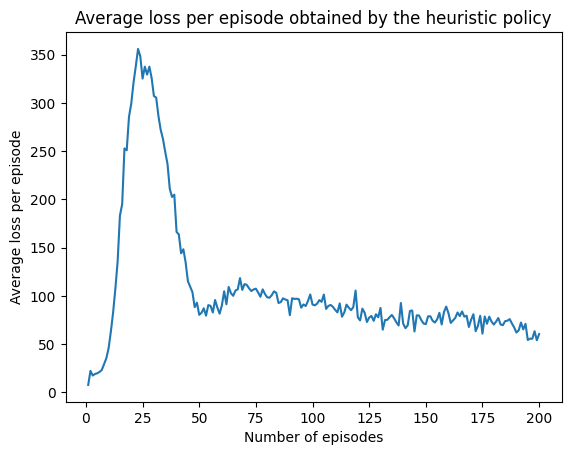

In [52]:
# Write a loop in which the HeuristicPendulumAgent collects experience and stores it in the replay
# buffer. At each step, sample a batch of transitions from the replay buffer (uniformly at random,
# batch size 128) and feed them to the 1-step TD-learning rule that you have implemented. At each
# step, store the loss of the Q network. 
import copy
env = gym.make("Pendulum-v1")
num_episode=200
batch_size=128
buffer_size=10000
gamma=0.99
learning_rate=1e-4
sum_loss=0
list_average_loss=[]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:',device)
# initialize the Q network 
Q_network=QNetwork().to(device)
Q_target=QNetwork().to(device)
Q_target.load_state_dict(Q_network.state_dict())
# define a optimizer for the QNetwork
optimizer = torch.optim.Adam(Q_network.parameters(), learning_rate)
# define replay buffer
replay_buffer=ReplayBuffer(buffer_size)
# define agent
agent = HeuristicPendulumAgent(env)
num_step=200

normalized_env = NormalizedEnv(env)
print('Start training...')
for episode in tqdm(range(num_episode)):
    # print('episode number:',episode,'/',num_episode,'...')
    # initialize the sum_loss for each episode
    sum_loss=0
    last_step=False
    # renew the environment for every episode
    if colab:
      # if running in google colab
      state= env.reset()
    else:
      # if running in own computer
      state, info = env.reset()
    
    for step in range(num_step):
        # print('step:',step,'/',num_step,'...')
        
        # add transition to replay buffer, and kick out the old one if the buffer is full
        action = agent.compute_action(state)
        # print('action:',action)
        normalized_action = normalized_env.action(action)
        # print('normalized_action:',normalized_action)
        
        if colab:
          # if running in google colab
          # for colab there only have one for terminated and truncated, not sure which one is, 
          # but since here we don't need both of them so it's fine
          next_state, reward, truncated, info = env.step(normalized_action)
          # print(next_state, reward, truncated, info)
        else:
          # if running in own computer
          next_state, reward, terminated,truncated, info = env.step(normalized_action)
        
        transition=(state, action, reward, next_state, truncated)
        replay_buffer.add(transition)
        state=next_state.copy()

        if len(replay_buffer) < batch_size:
            print("The replay buffer does not have enough transitions.")
            continue
    
        # sample a batch of transitions from the replay buffer
        batch = replay_buffer.sample(batch_size)

        # if it is last step, set last_step=True
        if step==num_step-1:
            last_step=True

        # TODO: check with TA if it is correct for giving only one Q_network
        loss,Q_network=train_QNetwork(Q_network,Q_target,normalized_env,agent, batch, gamma, optimizer,last_step,device,fix_torque=1)
        # print('loss:',loss)
        # if loss is not None:
        sum_loss+=loss
        # for param, target_param in zip(Q_network.parameters(), Q_target.parameters()):
        #         print("BEFORE param:",param[0],param[0].requires_grad,"target_param:",target_param[0],target_param[0].requires_grad)
        #         break
       
        Q_target.load_state_dict(Q_network.state_dict())
        # print("Q_network:",Q_network.fc1.weight.grad[0])

        # for param, target_param in zip(Q_network.parameters(), Q_target.parameters()):
        #         print("AFTER param:",param[0],param[0].requires_grad,"target_param:",target_param[0],target_param[0].requires_grad)
        #         break

    average_loss=sum_loss/num_step
    # print('average_loss:',average_loss)
    list_average_loss.append(average_loss)
print('Finishing training!')
print('Save the model...')
# save the model with path name with real-time date and time
save_path= os.path.join('trained_model','Q_network_heuristic_policy_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.pth')
torch.save(Q_network.state_dict(), save_path)
print('Model save to ',save_path,' !')

list_number_episodes = np.linspace(1,num_episode,num = num_episode)
plt.plot(list_number_episodes,list_average_loss)
plt.xlabel('Number of episodes')
plt.ylabel('Average loss per episode')
plt.title('Average loss per episode obtained by the heuristic policy')
print('Save the figure...')
image_path=os.path.join('figure','4_TrainingCruveofQnetwork__'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.png')
plt.savefig(image_path)
plt.show()

env.close()


In [ ]:
# get the model weight
model_path=os.path.join('trained_model','Q_network_heuristic_policy_xxx.pth')
# initialize the Q network with the stored model
Q_network=QNetwork()
Q_network.load_state_dict(torch.load(model_path))

In [ ]:
# plot polar heatmap 

# training the Q_Network
import copy
env = gym.make("Pendulum-v1")
print('here')
num_episode=10
batch_size=128
buffer_size=10000
gamma=0.99
learning_rate=1e-4
# initialize the Q network 
Q_network=QNetwork()
Q_target=QNetwork()
Q_target.load_state_dict(Q_network.state_dict())
# define a optimizer for the QNetwork
optimizer = torch.optim.Adam(Q_network.parameters(), learning_rate)
# define replay buffer
replay_buffer=ReplayBuffer(buffer_size)
# define agent
agent = HeuristicPendulumAgent(env)
num_step=200

normalized_env = NormalizedEnv(env)
print('Start training...')
for episode in range(num_episode):
    print('episode number:',episode,'/',num_episode,'...')
    # renew the environment for every episode
    state, info = env.reset()
    
    for step in range(num_step):
        action = agent.compute_action(state)
        normalized_action = normalized_env.action(action)
        next_state, reward, terminated, truncated, info = env.step(normalized_action)
        transition=(state, normalized_action, reward, next_state, truncated)
        replay_buffer.add(transition)
        state=next_state

        if len(replay_buffer) < batch_size:
            print("The replay buffer does not have enough transitions.")
            continue
    
        # sample a batch of transitions from the replay buffer
        batch = replay_buffer.sample(batch_size)

        loss,Q_network=train_QNetwork(Q_network,Q_target,normalized_env,agent, batch, gamma, optimizer)
        Q_target.load_state_dict(Q_network.state_dict())
print('finished training...')

#action_values= np.random.uniform(-2, 2,5)
#velocity_values= np.random.uniform(-5, 5,5)
action_values= [-2,-1,0,1,2]
velocity_values=[-5,-2.5,0,2.5,5]
angles=np.linspace(0,2*np.pi,360)
angles_cosinus=[np.cos(ang) for ang in angles]
angles_sinus=[np.sin(ang) for ang in angles]


for j in range(5):
    Q_network_before_training=QNetwork()
    states=[np.append(np.append(angles_cosinus[i],angles_sinus[i]),velocity_values[j]) for i in range(360)]
    #print('states= ', states)
    inputs=torch.tensor([np.append(states[i],action_values[j]) for i in range(360)], dtype=torch.float32)
    print ('*******************************************************************************************')
    print('(action',j+1,'=',action_values[j], ', velocity',j+1,'=',velocity_values[j], ')')
    Q_values_before_training=Q_network_before_training(inputs)
    Q_values_before_training=Q_values_before_training.detach().numpy()
    print ('before training!')
    # print('Q_values before training = ', Q_values_before_training)
    Q_Matrix_before_training=Q_values_before_training
    for i in range(359):
        Q_Matrix_before_training=np.column_stack((Q_Matrix_before_training,Q_values_before_training))
    fig_before_training = plt.figure()
    rad=np.linspace(0,5,360)
    r,th=np.meshgrid(rad,angles)
    ax_before_training = fig_before_training.add_subplot(111, polar=True)
    p_before_training = ax_before_training.pcolormesh(th, r, Q_Matrix_before_training)
    fig_before_training.colorbar(p_before_training)
    plt.show()

    Q_values_after_training = Q_network(inputs)
    Q_values_after_training = Q_values_after_training.detach().numpy()
    print ('after training!')
    # print('Q_values after training = ', Q_values_after_training)
    Q_Matrix_after_training = Q_values_after_training
    for i in range(359):
        Q_Matrix_after_training=np.column_stack((Q_Matrix_after_training,Q_values_after_training))
    fig_after_training = plt.figure()
    ax_after_training = fig_after_training.add_subplot(111, polar=True)
    p_after_training = ax_after_training.pcolormesh(th, r, Q_Matrix_after_training)
    fig_after_training.colorbar(p_after_training)
    plt.show()


here
Start training...
episode number: 0 / 1000 ...


ValueError: ignored

## Part 5 Minimal implementation of DDPG

In [ ]:
# PolicyNetwork
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim=3, output_dim=1, hidden_dim=32):
        super(PolicyNetwork, self).__init__()
        # input_dim: dimension of the input -> 3 elements of the state
        # hidden_dim: dimension of one hidden layer -> 32 nodes
        # output_dim: dimension of action -> a scalar (action)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, state):
        # state: state -> 3 elements of the state
        # return action 
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        # apply tanh to restrict the action in the range [-1, 1]
        x = F.tanh(self.fc3(x))

        return x

In [ ]:
#GaussianActionNoise
class GaussianActionNoise():
    def __init__(self, sigma):
        self.sigma = sigma
        self.mu=0
    def get_noisy_action(self,action):
        noise = np.random.normal(self.mu,self.sigma)
        noisy_action = action + noise
        # clip the noisy action to be in the range [-1, 1]
        noisy_action = np.clip(noisy_action, -1, 1)
        return noisy_action

In [ ]:
# DDPGAgent
class DDPGAgent():
    def __init__(self,env,sigma):
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.shape[0]
        self.agent_name='DDPGAgent'
        self.action_noise=GaussianActionNoise(sigma)

    def compute_action(self,policy_network,state,deterministic=True):
        # deterministic: regulates whether to add random noise to the action or not
        with torch.no_grad():
            # convert state to tensor
            state = torch.tensor(state, dtype=torch.float)
            # compute the action
            action = policy_network(state)
            if not deterministic:
                # add random noise to the action
                action = self.action_noise.get_noisy_action(action)
            # convert action to numpy array
            action = action.numpy()
        return action

In [ ]:
# Train PolicyNetwork
def train_PolicyNetwork(policy_network,Q_network, batch, optimizer,device):
    # print("HERE TRAIN")
    # optimizer: optimizer
    
    # unpack the batch of transitions
    state_batch=torch.tensor([transition[0] for transition in batch], dtype=torch.float).to(device)

    # clear the gradients of the optimizer
    optimizer.zero_grad()

    
    # policy_network: policy use for action selection
    predicted_action = policy_network(state_batch)
    # with torch.no_grad():
    # compute the Q values of the current state + predicted action pair
    Q_values = Q_network(torch.cat((state_batch,predicted_action),1).to(device))
        
    # print("Q_values:",Q_values)
    # print(' -Q_values.mean():', -Q_values.mean())
    # compute the loss
    loss = -Q_values.mean()
    
    
    # compute the gradients of the loss
    loss.backward()
    
    # update the weights of the Q network
    optimizer.step()
    
    return loss.item(), policy_network, predicted_action

In [ ]:
env = gym.make("Pendulum-v1")
num_episode=1000
num_step=200
batch_size=128
buffer_size=100000
gamma=0.99
learning_rate=1e-4
sigma=0.3
deterministic=False
list_average_loss_Q_network=[]
list_average_loss_policy_network=[]
list_reward=[]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# initialize the Q network 
Q_network=QNetwork().to(device)
Q_target=QNetwork().to(device)
# define policy network
policy_network=PolicyNetwork().to(device)
Q_target.load_state_dict(Q_network.state_dict())
# define a optimizer for the QNetwork
optimizer = torch.optim.Adam(Q_network.parameters(), learning_rate)
# define replay buffer
replay_buffer=ReplayBuffer(buffer_size)
# define agent
agent = DDPGAgent(env,sigma)

print('Start training...')
for episode in tqdm(range(num_episode)):
    sum_reward=0
    # print('episode number:',episode,'/',num_episode,'...')
    # initialize the sum_loss for each episode
    sum_loss_Q_network=0
    sum_loss_policy_network=0
    # renew the environment for every episode
    state, info = env.reset()
    normalized_env = NormalizedEnv(env)
    last_step=False
    for step in range(num_step):
        # print('step:',step,'/',num_step,'...')
        
        # add transition to replay buffer, and kick out the old one if the buffer is full
        # add noise to action when deterministic=False
        action = agent.compute_action(policy_network,state,deterministic)
        # print('action:',action)
        normalized_action = normalized_env.action(action)
        # print('normalized_action:',normalized_action)
        next_state, reward, terminated, truncated, info = env.step(normalized_action)
        transition=(state, normalized_action, reward, next_state, truncated)
        replay_buffer.add(transition)
        state=next_state

        if len(replay_buffer) < batch_size:
            print("The replay buffer does not have enough transitions.")
            continue
    
        # sample a batch of transitions from the replay buffer
        batch = replay_buffer.sample(batch_size)

        # train the policy_network
        loss_policy_network,policy_network,predict_actions=train_PolicyNetwork(policy_network,Q_network, batch, optimizer,device)
        predict_rewards=0
        for batch_idx in range(batch_size):
            normalized_predict_action = normalized_env.action(predict_actions[batch_idx].item())
            _, predict_reward, _, _, _ = env.step(normalized_predict_action)
            predict_rewards+=predict_reward
        avg_predict_reward=predict_rewards/batch_size
        sum_reward+=avg_predict_reward

        # if it is last step, set last_step=True
        if step==num_step-1:
            last_step=True

        # TODO: check with TA if it is correct 
        loss_Q_network,Q_network=train_QNetwork(Q_network,Q_target,normalized_env,agent, batch, gamma, optimizer,last_step,device,fix_torque=None,policy_network=policy_network,deterministic=deterministic)
        if loss_Q_network is not None:
            sum_loss_Q_network+=loss_Q_network
        if loss_policy_network is not None:   
            sum_loss_policy_network+=loss_policy_network
        Q_target.load_state_dict(Q_network.state_dict())
        
    average_loss_Q_network=sum_loss_Q_network/num_step
    average_loss_policy_network=sum_loss_policy_network/num_step
    list_average_loss_Q_network.append(average_loss_Q_network)
    list_average_loss_policy_network.append(average_loss_policy_network)
    list_reward.append(sum_reward)
print('Finishing training!')
# print('Save the model...')
# # save the model with path name with real-time date and time
# save_path_Q= os.path.join('trained_model','5_Qnetwork_DDPG_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.pth')
# torch.save(Q_network.state_dict(), save_path_Q)
# print('Qnetwork Model save to ',save_path_Q,' !')
# save_path_Policy= os.path.join('trained_model','5_Policynetwork_DDPG_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.pth')
# torch.save(policy_network.state_dict(), save_path_Policy)
# print('Policy network Model save to ',save_path_Policy,' !')

list_number_episodes = np.linspace(1,num_episode,num = num_episode)
plt.plot(list_number_episodes,list_average_loss_Q_network, label='Average loss obtained by the Q-Network')
plt.plot(list_number_episodes,list_average_loss_policy_network, label='Average loss obtained by the policy Network')
plt.xlabel('Number of episodes')
plt.ylabel('Average loss per episode')
plt.title('Average loss obtained by the Q-Network and the policy Network')
plt.legend()
print('Save the figures...')
image_path=os.path.join('figure','5_AverageLoss_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.png')
plt.savefig(image_path)
plt.show()
plt.figure()
plt.plot(list_number_episodes,list_reward)
plt.xlabel('Number of episodes')
plt.ylabel('Accumulated reward')
plt.title('Accumulated reward per episode')
print('Save the figures...')
image_path=os.path.join('figure','5_AccumulatedRewardPerEpisode__'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.png')
plt.savefig(image_path)
plt.show()
env.close()

Start training...


  0%|          | 0/1000 [00:00<?, ?it/s]

The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay buffer does not have enough transitions.
The replay b

  0%|          | 1/1000 [00:18<5:03:44, 18.24s/it]


KeyboardInterrupt: 

Start testing...
episode number: 0 / 100 ...
episode number: 1 / 100 ...
episode number: 2 / 100 ...
episode number: 3 / 100 ...
episode number: 4 / 100 ...
episode number: 5 / 100 ...
episode number: 6 / 100 ...
episode number: 7 / 100 ...
episode number: 8 / 100 ...
episode number: 9 / 100 ...
episode number: 10 / 100 ...
episode number: 11 / 100 ...
episode number: 12 / 100 ...
episode number: 13 / 100 ...
episode number: 14 / 100 ...
episode number: 15 / 100 ...
episode number: 16 / 100 ...
episode number: 17 / 100 ...
episode number: 18 / 100 ...
episode number: 19 / 100 ...
episode number: 20 / 100 ...
episode number: 21 / 100 ...
episode number: 22 / 100 ...
episode number: 23 / 100 ...
episode number: 24 / 100 ...
episode number: 25 / 100 ...
episode number: 26 / 100 ...
episode number: 27 / 100 ...
episode number: 28 / 100 ...
episode number: 29 / 100 ...
episode number: 30 / 100 ...
episode number: 31 / 100 ...
episode number: 32 / 100 ...
episode number: 33 / 100 ...
episode

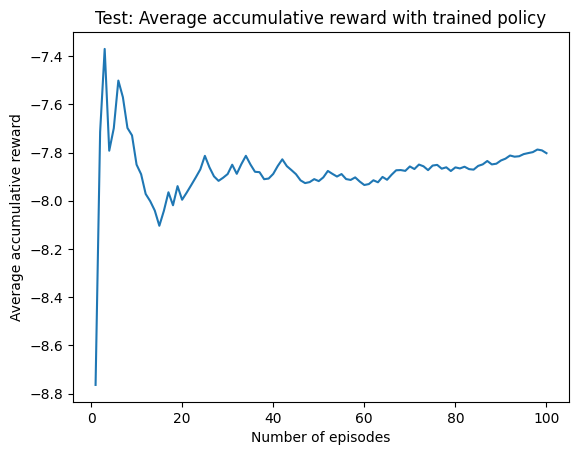

In [ ]:
# Excute Test with the trained model

env = gym.make("Pendulum-v1")
num_episode=100
num_step=200
sigma=0.3
deterministic=True
episode_accumulated_reward=0
list_avg_accumulated_reward=[]

# get the model weight
policy_model_path=os.path.join('trained_model','5_Policynetwork_DDPG_202305042005_ep10.pth')
qnetwork_model_path=os.path.join('trained_model','5_Qnetwork_DDPG_202305042005_ep10.pth')
# initialize the Q network with the stored model
Q_network=QNetwork()
Q_network.load_state_dict(torch.load(qnetwork_model_path))
# initialize the policy network with the stored model
policy_network=PolicyNetwork()
policy_network.load_state_dict(torch.load(policy_model_path))

# define agent
agent = DDPGAgent(env,sigma)

print('Start testing...')
for episode in range(num_episode):
    sum_reward=0
    print('episode number:',episode,'/',num_episode,'...')
    # initialize the sum_loss for each episode
    sum_loss_Q_network=0
    sum_loss_policy_network=0
    # renew the environment for every episode
    state, info = env.reset()
    normalized_env = NormalizedEnv(env)
    with torch.no_grad():
        for step in range(num_step):
            # print('step:',step,'/',num_step,'...')
            
            # create new transition/data
            # do not add noise to action by deterministic=True
            action = agent.compute_action(policy_network,state,deterministic)
            # print('action:',action)
            normalized_action = normalized_env.action(action)
            # print('normalized_action:',normalized_action)
            next_state, reward, terminated, truncated, info = env.step(normalized_action)
            state=next_state
        
            # unpack the batch of transitions
            # only 1 btach here since here is testing
            state_batch=torch.tensor([state], dtype=torch.float)

            # policy_network: policy use for action selection
            predicted_action = policy_network(state_batch)
            
            # print('predicted_action:',predicted_action.item())
            normalized_predict_action = normalized_env.action(predicted_action.item())
            _, predict_reward, _, _, _ = env.step(normalized_predict_action)
            
            sum_reward+=predict_reward
        episode_accumulated_reward+=sum_reward/num_step
        list_avg_accumulated_reward.append(episode_accumulated_reward/(episode+1))

list_number_episodes = np.linspace(1,num_episode,num = num_episode)
plt.plot(list_number_episodes,list_avg_accumulated_reward)
plt.xlabel('Number of episodes')
plt.ylabel('Average accumulative reward')
plt.title('Test: Average accumulative reward with trained policy')
print('Save the figures...')
image_path=os.path.join('figure','5_TestAvgAccumulativeReward__'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'_ep'+str(num_episode)+'.png')
plt.savefig(image_path)
plt.show()
env.close()



In [ ]:
# polar heatmap 
env = gym.make("Pendulum-v1")
num_episode=10 #100
num_step=200
batch_size=128
buffer_size=100000
gamma=0.99
learning_rate=1e-4
sigma=0.3
deterministic=False
# initialize the Q network 
Q_network=QNetwork()
Q_target=QNetwork()
# define policy network
policy_network=PolicyNetwork()
Q_target.load_state_dict(Q_network.state_dict())
# define a optimizer for the QNetwork
optimizer = torch.optim.Adam(Q_network.parameters(), learning_rate)
# define replay buffer
replay_buffer=ReplayBuffer(buffer_size)
# define agent
agent = DDPGAgent(env,sigma)

print('Start training...')
for episode in range(num_episode):
    print('episode number:',episode,'/',num_episode,'...')
    # renew the environment for every episode
    state, info = env.reset()
    normalized_env = NormalizedEnv(env)
    for step in range(num_step):
        # print('step:',step,'/',num_step,'...')
        
        # add transition to replay buffer, and kick out the old one if the buffer is full
        # add noise to action when deterministic=False
        action = agent.compute_action(policy_network,state,deterministic)
        normalized_action = normalized_env.action(action)
        next_state, reward, terminated, truncated, info = env.step(normalized_action)
        transition=(state, normalized_action, reward, next_state, truncated)
        replay_buffer.add(transition)
        state=next_state

        if len(replay_buffer) < batch_size:
            print("The replay buffer does not have enough transitions.")
            continue
    
        # sample a batch of transitions from the replay buffer
        batch = replay_buffer.sample(batch_size)

        # train the policy_network
        loss_policy_network,policy_network,predict_actions=train_PolicyNetwork(policy_network,Q_network, batch, optimizer) 
        loss_Q_network,Q_network=train_QNetwork(Q_network,Q_target,normalized_env,agent, batch, gamma, optimizer,fix_torque=None,policy_network=policy_network,deterministic=deterministic)
        Q_target.load_state_dict(Q_network.state_dict())
        
#action_values= np.random.uniform(-2, 2,5)
#velocity_values= np.random.uniform(-5, 5,5)
action_values= [-2,-1,0,1,2]
velocity_values=[-5,-2.5,0,2.5,5]
angles=np.linspace(0,2*np.pi,360)
angles_cosinus=[np.cos(ang) for ang in angles]
angles_sinus=[np.sin(ang) for ang in angles]


for j in range(5):
    Q_network_before_training=QNetwork()
    states=[np.append(np.append(angles_cosinus[i],angles_sinus[i]),velocity_values[j]) for i in range(360)]
    #print('states= ', states)
    inputs=torch.tensor([np.append(states[i],action_values[j]) for i in range(360)], dtype=torch.float32)
    print ('*******************************************************************************************')
    print('(action',j+1,'=',action_values[j], ' , velocity',j+1,'=',velocity_values[j], ')')
    Q_values_before_training=Q_network_before_training(inputs)
    Q_values_before_training=Q_values_before_training.detach().numpy()
    print ('before training!')
    # print('Q_values before training = ', Q_values_before_training)
    Q_Matrix_before_training=Q_values_before_training
    for i in range(359):
        Q_Matrix_before_training=np.column_stack((Q_Matrix_before_training,Q_values_before_training))
    fig_before_training = plt.figure()
    rad=np.linspace(0,5,360)
    r,th=np.meshgrid(rad,angles)
    ax_before_training = fig_before_training.add_subplot(111, polar=True)
    p_before_training = ax_before_training.pcolormesh(th, r, Q_Matrix_before_training)
    fig_before_training.colorbar(p_before_training)
    plt.show()

    Q_values_after_training = Q_network(inputs)
    Q_values_after_training = Q_values_after_training.detach().numpy()
    print ('after training!')
    # print('Q_values after training = ', Q_values_after_training)
    Q_Matrix_after_training = Q_values_after_training
    for i in range(359):
        Q_Matrix_after_training=np.column_stack((Q_Matrix_after_training,Q_values_after_training))
    fig_after_training = plt.figure()
    ax_after_training = fig_after_training.add_subplot(111, polar=True)
    p_after_training = ax_after_training.pcolormesh(th, r, Q_Matrix_after_training)
    fig_after_training.colorbar(p_after_training)
    plt.show()

# Part 6 : Target networks

In [ ]:
# DDPGAgent
class DDPGAgent():
    def __init__(self,env,sigma,tau):
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.shape[0]
        self.agent_name='DDPGAgent'
        self.action_noise=GaussianActionNoise(sigma)

        self.actor_network = PolicyNetwork()
        self.actor_target = PolicyNetwork()
        self.actor_target.load_state_dict(self.actor_network.state_dict())

        self.critic_network = QNetwork()
        self.critic_target = QNetwork()
        self.critic_target.load_state_dict(self.critic_network.state_dict())

        self.tau = tau

    def compute_action(self,policy_network,state,deterministic=True):
        # deterministic: regulates whether to add random noise to the action or not
        with torch.no_grad():
            # convert state to tensor
            state = torch.tensor(state, dtype=torch.float)
            # compute the action
            action = policy_network(state)
            if not deterministic:
                # add random noise to the action
                action = self.action_noise.get_noisy_action(action)
            # convert action to numpy array
            action = action.numpy()
        return action
    
    def update_target_params(self):
        # update the parameters of networks
        with torch.no_grad():
            # for param, target_param in zip(self.critic_network.parameters(), self.critic_target.parameters()):
            #        print("param:",param,"target_param:",target_param)
            
            for param, target_param in zip(self.critic_network.parameters(), self.critic_target.parameters()):
                    target_param.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

            # for param, target_param in zip(self.critic_network.parameters(), self.critic_target.parameters()):
            #         print("param:",param,"target_param:",target_param)
            
            
            for param, target_param in zip(self.actor_network.parameters(), self.actor_target.parameters()):
                target_param.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
    


In [ ]:
env = gym.make("Pendulum-v1")
agent=DDPGAgent(env,sigma=1,tau=1)
agent.update_target_params()

param: Parameter containing:
tensor([[ 0.1337,  0.2907, -0.4738, -0.1623],
        [ 0.2650, -0.2635,  0.2133, -0.2514],
        [ 0.4840, -0.0874,  0.2426, -0.3500],
        [ 0.4387, -0.2060, -0.0940,  0.3357],
        [-0.1981,  0.4028,  0.3692,  0.4964],
        [ 0.4803, -0.3444, -0.3656, -0.0080],
        [-0.1088,  0.4704,  0.0819,  0.1799],
        [-0.2702, -0.3917, -0.2243,  0.1432],
        [-0.3620,  0.4207,  0.0549, -0.4528],
        [-0.1462,  0.4691, -0.3018, -0.0072],
        [ 0.1861,  0.1762,  0.2910, -0.3104],
        [ 0.0869,  0.2508, -0.4310,  0.1382],
        [ 0.0921, -0.4963, -0.3537,  0.3927],
        [-0.3188, -0.2684, -0.1968, -0.1823],
        [-0.1618, -0.1758, -0.2084, -0.1656],
        [-0.3481,  0.2312, -0.1967, -0.2341],
        [ 0.2853,  0.4237,  0.3119,  0.3537],
        [-0.0530,  0.1259, -0.0856,  0.2233],
        [ 0.4906,  0.4377,  0.2701,  0.3642],
        [-0.2194,  0.1395,  0.0486,  0.4651],
        [ 0.4211,  0.1656,  0.1872, -0.2973],
     